# Introduction


**What?** PDP = Partial Dependence Plots V2



# Introduction to DDP


- Feature importance: what variables most affect predictions?
- PDP: how a feature affects predictions?
- What the DDP works out doing is to **separate the effect** of each feature on the output.



# Import modules

In [11]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset

In [2]:
data = pd.read_csv('../DATASETS/FIFA_2018_Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Build the model

In [3]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

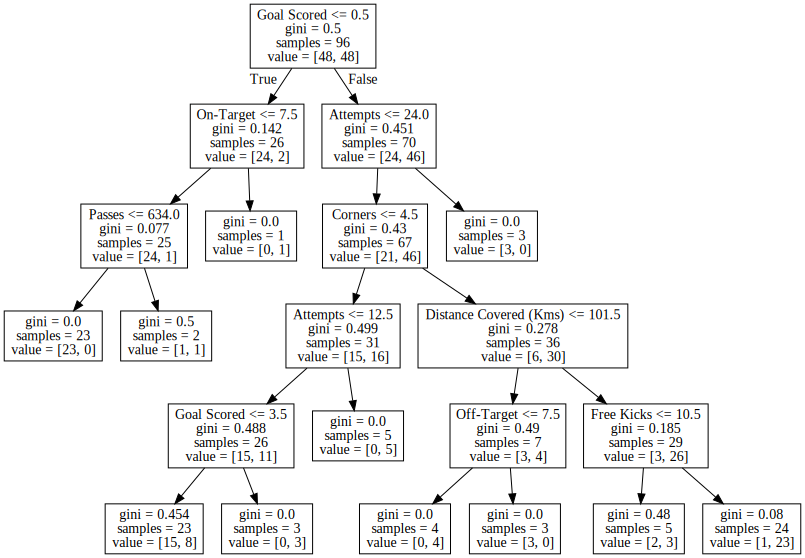

In [4]:
# Let's visualise how our tree made the decision
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

# PDP for Goal Scored


- The y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.    
- A blue shaded area indicates level of confidence
- Scoring a goal substantially increases your chances of winning "Man of The Match." 
- However, extra goals beyond that appear to have little impact on predictions.



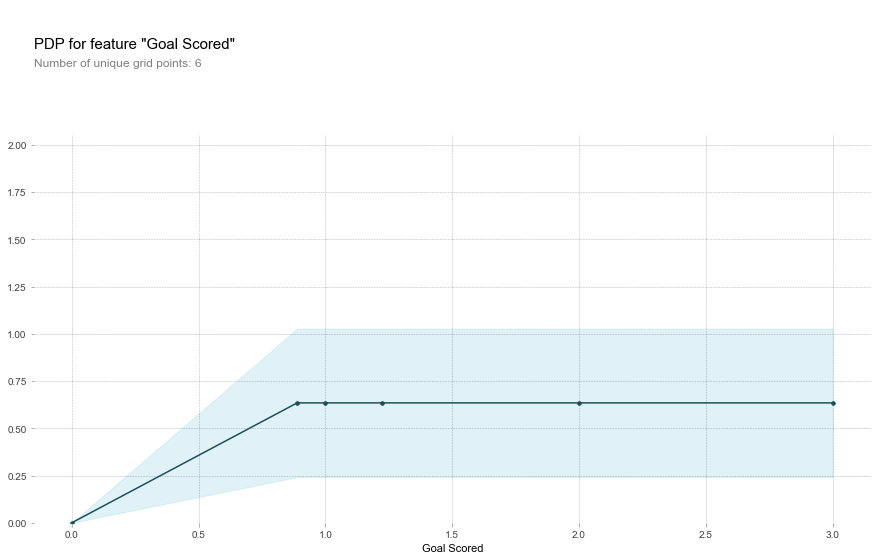

In [12]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')

# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

# PDP for Distance Covered


- Keep in mind that the PDF depends on the model used.
- If in doubt simply used another model and this what we are going to do below.



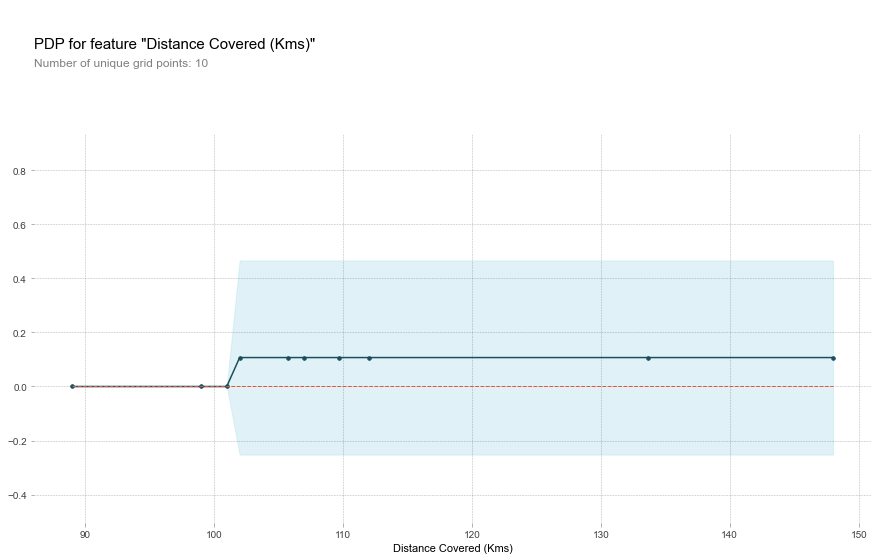

In [6]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

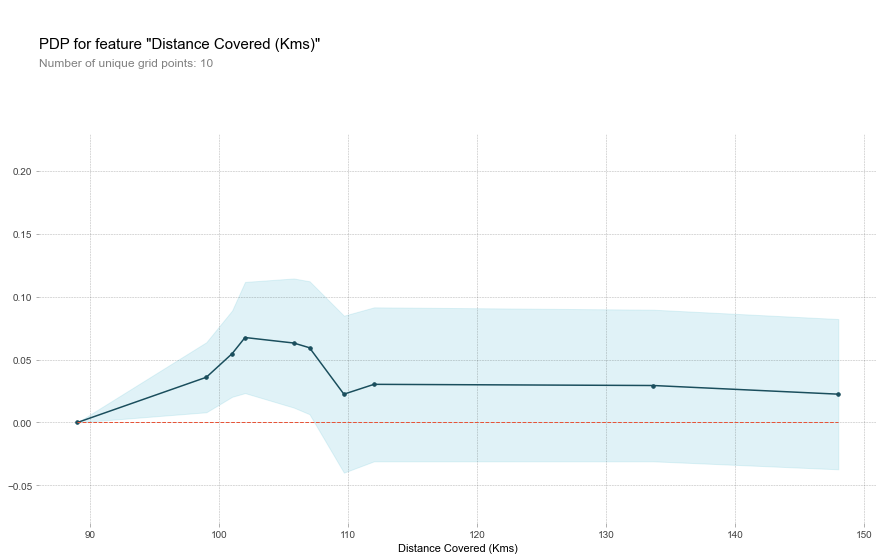

In [13]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

# 2D Partial Dependence Plots


- This graph shows predictions for any combination of Goals Scored and Distance covered.
- For example, we see the highest predictions when a team scores at least 1 goal and they run a total distance close to 100km. If they score 0 goals, distance covered doesn't matter. 
- Can you see this by tracing through the decision tree with 0 goals?  



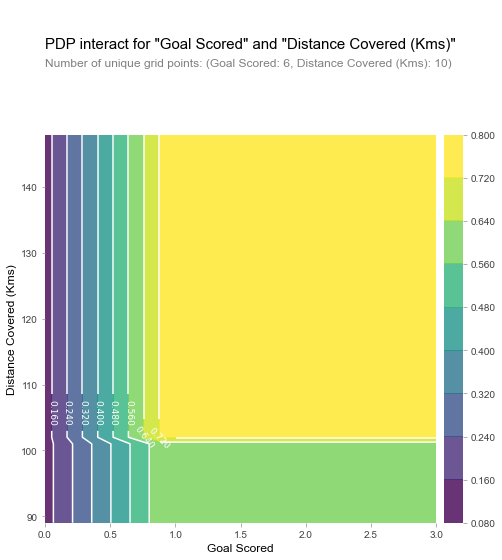

In [8]:
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

# References


- https://www.kaggle.com/dansbecker/partial-plots 

